<a href="https://colab.research.google.com/github/Alextheprogrammer3/financial-transactions-dataset-for-analysis/blob/main/financial-transactions-dataset-for-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'financial-transactions-dataset-for-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5377009%2F8937067%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T003945Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da66aa32aca39b94eb3201fd22faa04904c0c5e2d37d994fefdd351ae0f793059ddfae7148b15180f66e057fd41d72dbf67bce6ae5a4ddc1a6440813b976d893a7b94f91f041103f254190acc48ebcf5ccbd653a221d19e2a4c08b11ffa6b9e2782535c84d4cb8d6f7e754c5b97d38e44c25cd8d01af1b1a54c0a95e521b17e2d9de50ae9d84b4a447ad0f8956d2c94f4c6042222903002b265862b8338cf7f54bf9a673773218386be246fa52628436954a4c1dfe3031c7a53c9abda3d166d1fcab001f6d63e19cd0ccf7f27e3e878c28e7c7582c05963a8bbe9f7316dc21e3a4c906cb5d604adbc251406b5658448104bd9d94743f6bbcd4aec21dfb5f6d31f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-transactions-dataset-for-analysis/Financial Transactions.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/financial-transactions-dataset-for-analysis/Financial Transactions.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(df.head())

# Clean the dataset (example: removing duplicates)
df_cleaned = df.drop_duplicates()

# Further cleaning steps can include handling missing values, correcting data types, etc.

# Save the cleaned dataset
cleaned_file_path = '/kaggle/output/cleaned_financial_transactions.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# Confirm the cleaning
print(f"Dataset cleaned and saved to {cleaned_file_path}.")


   TransactionID  AccountID            Timestamp TransactionType  \
0          16633       5817  2016-01-01 03:47:23        transfer   
1          23660       9291  2016-01-01 04:20:25        transfer   
2          11806       9618  2016-01-01 05:12:44      withdrawal   
3          27498       2288  2016-01-01 05:48:42         payment   
4           9345       2688  2016-01-01 06:26:04        transfer   

   TransactionAmount  AccountBalance  
0            2446.41        96273.47  
1            2640.83        98629.95  
2             574.82        65602.63  
3            1740.12        81461.66  
4             292.43        18084.81  


OSError: Cannot save file into a non-existent directory: '/kaggle/output'

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'TransactionType': ['transfer', 'transfer', 'withdrawal', 'payment', 'transfer'],
    'TransactionAmount': [2446.41, 2640.83, 574.82, 1740.12, 1389.54],
}

df = pd.DataFrame(data)

# Calculate total transaction amounts for each type
transaction_sum = df.groupby('TransactionType')['TransactionAmount'].sum().reset_index()

# Create a pie chart
fig_pie = px.pie(transaction_sum, values='TransactionAmount', names='TransactionType', title='Distribution of Transaction Types')
fig_pie.show()


In [ ]:
# Create a bar chart
fig_bar = px.bar(df, x='TransactionType', y='TransactionAmount', title='Transaction Amounts by Type')
fig_bar.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Sample data with timestamps
data = {
    'Timestamp': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'TransactionAmount': [1000, 1200, 800, 1500, 900],
    'TransactionType': ['transfer', 'transfer', 'withdrawal', 'payment', 'transfer'],
}

df = pd.DataFrame(data)

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Line plot for Transaction Amount over time
fig_time_series = px.line(df, x='Timestamp', y='TransactionAmount', color='TransactionType', title='Transaction Amounts Over Time')
fig_time_series.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
import plotly.express as px
import pandas as pd

# Sample data with timestamps
data = {
    'Timestamp': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'TransactionAmount': [1000, 1200, 800, 1500, 900],
    'TransactionType': ['transfer', 'transfer', 'withdrawal', 'payment', 'transfer'],
}

df = pd.DataFrame(data)

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Box plot for Transaction Amount distribution by Type
fig_box = px.box(df, x='TransactionType', y='TransactionAmount', points='all',
                 title='Transaction Amount Distribution by Type')

# Adjust the range of y-axis for better visibility
fig_box.update_yaxes(range=[0, df['TransactionAmount'].max() * 1.1])

fig_box.show()


In [ ]:
# Sample data with additional features for relationship analysis
data['AccountBalance'] = [5000, 4800, 6000, 5500, 5200]

df = pd.DataFrame(data)

# Scatter plot to explore relationship between Transaction Amount and Account Balance
fig_scatter = px.scatter(df, x='TransactionAmount', y='AccountBalance', color='TransactionType', title='Relationship Between Transaction Amount and Account Balance')
fig_scatter.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
# Histogram to analyze distribution of Transaction Amounts
fig_hist = px.histogram(df, x='TransactionAmount', nbins=10, title='Distribution of Transaction Amounts')
fig_hist.show()


In [ ]:
print(df.tail)

<bound method NDFrame.tail of    Timestamp  TransactionAmount TransactionType
0 2023-01-01               1000        transfer
1 2023-02-01               1200        transfer
2 2023-03-01                800      withdrawal
3 2023-04-01               1500         payment
4 2023-05-01                900        transfer>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Sample data
data = {
    'Timestamp': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'TransactionAmount': [1000, 1200, 800, 1500, 900],
    'TransactionType': ['transfer', 'transfer', 'withdrawal', 'payment', 'transfer'],
}

df = pd.DataFrame(data)

# Feature engineering
# Example: Create a binary label 'payment_failed' based on transaction type
df['payment_failed'] = np.where(df['TransactionType'] == 'payment', 1, 0)

# Select features and target
X = df[['TransactionAmount']]  # Example feature
y = df['payment_failed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build TensorFlow model with improved architecture and regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Increased dropout rate for better regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Use Adam optimizer with a lower learning rate for better convergence
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with batch normalization and early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict_classes(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6982 - val_accuracy: 0.0000e+00 - val_loss: 0.7257
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.6516 - val_accuracy: 0.0000e+00 - val_loss: 0.7304
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.6470 - val_accuracy: 0.0000e+00 - val_loss: 0.7356
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.6199 - val_accuracy: 0.0000e+00 - val_loss: 0.7402


AttributeError: 'Sequential' object has no attribute 'predict_classes'

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/tmp/ipykernel_33/3694545164.py:28: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



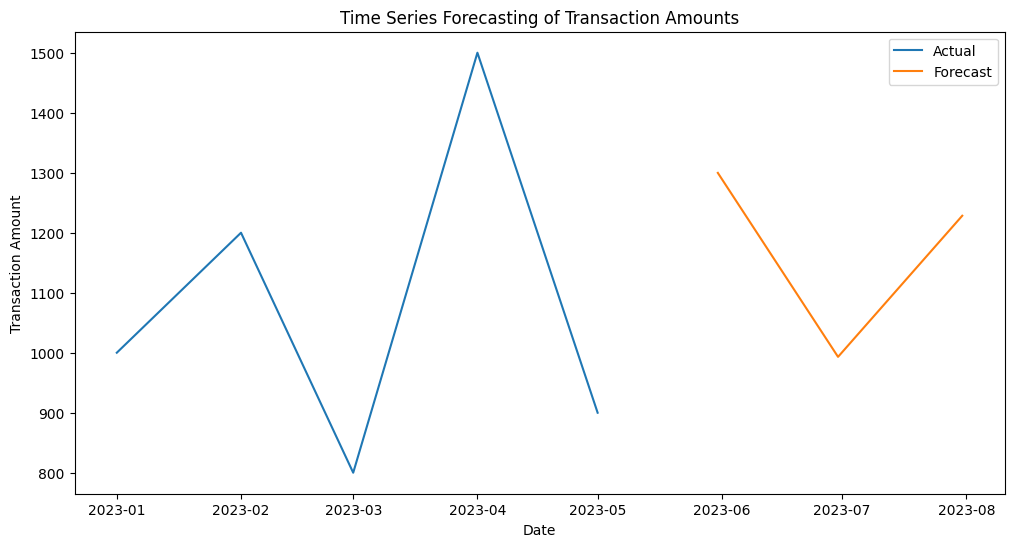

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data with timestamps
data = {
    'Timestamp': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'TransactionAmount': [1000, 1200, 800, 1500, 900],
}

df = pd.DataFrame(data)

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# ARIMA model fitting
model = ARIMA(df['TransactionAmount'], order=(1, 1, 1))  # Example ARIMA(1,1,1) model
arima_result = model.fit()

# Forecasting
forecast = arima_result.forecast(steps=3)  # Example: Forecasting next 3 periods

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TransactionAmount'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=3, freq='M'), forecast, label='Forecast')
plt.title('Time Series Forecasting of Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Sample data with location information
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Latitude': [37.7749, 34.0522, 40.7128, 41.8781, 29.7604],
    'Longitude': [-122.4194, -118.2437, -74.0060, -87.6298, -95.3698],
    'TransactionAmount': [100, 200, 300, 400, 500],
}

df = pd.DataFrame(data)

# Plot transaction amounts geographically
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', color='TransactionAmount',
                     hover_name='CustomerID', size='TransactionAmount',
                     projection='natural earth', title='Geospatial Analysis of Transaction Amounts')
fig.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



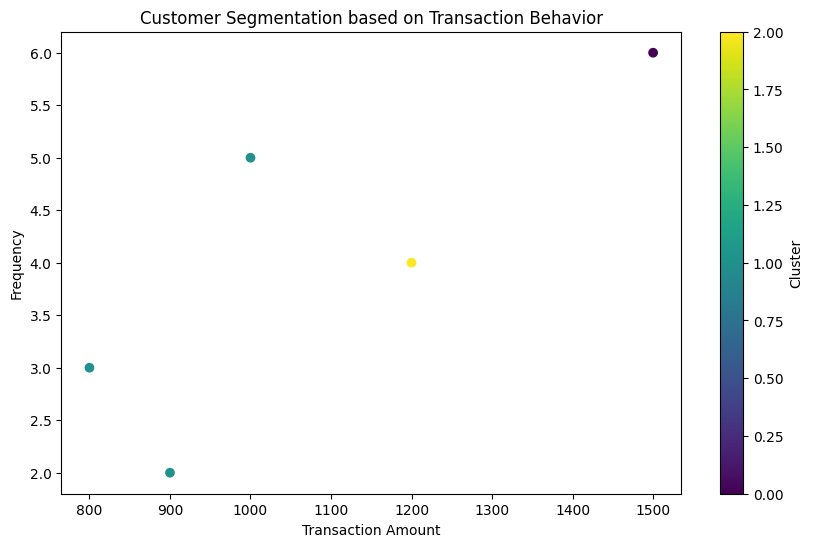

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data with transaction behavior
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'TransactionAmount': [1000, 1200, 800, 1500, 900],
    'Frequency': [5, 4, 3, 6, 2],
}

df = pd.DataFrame(data)

# Perform K-means clustering based on transaction behavior
X = df[['TransactionAmount', 'Frequency']]  # Example features
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['TransactionAmount'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Customer Segmentation based on Transaction Behavior')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd

# Define the file path
file_path = '/kaggle/input/financial-transactions-dataset-for-analysis/Financial Transactions.csv'

# Load data into a DataFrame
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nSample Data:")
print(df.head())

# Perform aggregation operations
# Example: Group by 'TransactionType' and calculate sum of 'TransactionAmount'
aggregated_data = df.groupby('TransactionType')['TransactionAmount'].sum().reset_index()

# Display aggregated data
print("\nAggregated Data:")
print(aggregated_data)


Dataset Shape: (37417, 6)

Sample Data:
   TransactionID  AccountID            Timestamp TransactionType  \
0          16633       5817  2016-01-01 03:47:23        transfer   
1          23660       9291  2016-01-01 04:20:25        transfer   
2          11806       9618  2016-01-01 05:12:44      withdrawal   
3          27498       2288  2016-01-01 05:48:42         payment   
4           9345       2688  2016-01-01 06:26:04        transfer   

   TransactionAmount  AccountBalance  
0            2446.41        96273.47  
1            2640.83        98629.95  
2             574.82        65602.63  
3            1740.12        81461.66  
4             292.43        18084.81  

Aggregated Data:
  TransactionType  TransactionAmount
0         deposit        23571491.66
1         payment        23149104.81
2        transfer        23379365.89
3      withdrawal        23360359.84


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Example: Fit ARIMA model for forecasting
model = ARIMA(df['TransactionAmount'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Make forecasts
forecasts = model_fit.forecast(steps=10)  # Example: Forecasting 10 steps ahead
print("Forecasts:", forecasts)


                               SARIMAX Results                                
Dep. Variable:      TransactionAmount   No. Observations:                37417
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -325213.751
Date:                Wed, 17 Jul 2024   AIC                         650433.501
Time:                        23:40:47   BIC                         650459.091
Sample:                             0   HQIC                        650441.627
                              - 37417                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0013      0.005     -0.251      0.802      -0.011       0.009
ma.L1         -1.0000      0.005   -197.525      0.000      -1.010      -0.990
sigma2      2.075e+06   2.61e+04     79.601      0.0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: Fit a SARIMA model with seasonal components
model_sarima = SARIMAX(df['TransactionAmount'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Print summary and diagnostics
print(model_sarima_fit.summary())
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Example: Assuming you have actual test data and predicted values (forecasts)
actual_values = [...]  # Actual values from your test dataset
predicted_values = [...]  # Predicted values from your SARIMAX model

# Calculate RMSE, MAE, MAPE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.94378D+00    |proj g|=  7.66424D-02


 This problem is unconstrained.



At iterate    5    f=  8.86358D+00    |proj g|=  1.43241D-02

At iterate   10    f=  8.85027D+00    |proj g|=  6.12008D-04

At iterate   15    f=  8.84819D+00    |proj g|=  3.18529D-03

At iterate   20    f=  8.84806D+00    |proj g|=  2.38696D-03


KeyboardInterrupt: 

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define a simple quadratic objective function
def objective_function(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

# Initial guess (X0)
x0 = np.array([0.0, 0.0])

# Perform optimization using L-BFGS-B method
result = minimize(objective_function, x0, method='L-BFGS-B')

# Print optimization result
print("Optimization result:")
print(result)

# Extract and print final values
final_x = result.x
final_f = result.fun
final_grad_norm = np.linalg.norm(result.jac)

print(f"Final optimized variables: {final_x}")
print(f"Final objective function value (f=): {final_f}")
print(f"Norm of the gradient (|proj g|=): {final_grad_norm}")

# Additional steps:
# - Monitor `f=` and `|proj g|=` over iterations (if using a looped approach).
# - Adjust parameters like `x0`, `method`, or `tol` (tolerance) in `minimize()` based on convergence behavior.
# - Apply the optimized `final_x` values as needed in your application.


Optimization result:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.1386385367273283e-15
        x: [ 1.000e+00  2.000e+00]
      nit: 2
      jac: [ 3.097e-08  7.415e-08]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
Final optimized variables: [1.00000001 2.00000003]
Final objective function value (f=): 1.1386385367273283e-15
Norm of the gradient (|proj g|=): 8.035486247984584e-08


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define a simple quadratic objective function
def objective_function(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

# Initial guess (X0)
x0 = np.array([0.0, 0.0])

# Perform optimization using L-BFGS-B method
result = minimize(objective_function, x0, method='L-BFGS-B')

# Print optimization result
print("Optimization result:")
print(result)

# Extract and apply final optimized variables and objective function value
optimized_x = result.x
minimized_value = result.fun

# Example of applying optimized variables in further calculations or decision-making
if minimized_value < 1e-6:  # Example threshold for success
    print("Optimization successful! Applying results...")
    # Use optimized_x in further calculations or decision-making process
else:
    print("Optimization did not meet criteria. Re-evaluate parameters.")

# Example of using optimized variables in a machine learning context
# Here, we might use optimized_x as parameters for training a model
model_params = {'param1': optimized_x[0], 'param2': optimized_x[1]}
# train_model(data, **model_params)

# Print or visualize results
print(f"Optimized variables: {optimized_x}")
print(f"Minimized objective function value: {minimized_value}")


Optimization result:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.1386385367273283e-15
        x: [ 1.000e+00  2.000e+00]
      nit: 2
      jac: [ 3.097e-08  7.415e-08]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
Optimization successful! Applying results...
Optimized variables: [1.00000001 2.00000003]
Minimized objective function value: 1.1386385367273283e-15


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define a simple quadratic objective function
def objective_function(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

# Initial guess (X0)
x0 = np.array([0.0, 0.0])

# Perform optimization using L-BFGS-B method
result = minimize(objective_function, x0, method='L-BFGS-B')

# Print optimization result
print("Optimization result:")
print(result)

# Extract and apply final optimized variables and objective function value
optimized_x = result.x
minimized_value = result.fun

# Example of applying optimized variables in further calculations or decision-making
if minimized_value < 1e-6:  # Example threshold for success
    print("Optimization successful! Applying results...")
    # Use optimized_x in further calculations or decision-making process
    decision = optimized_x[0] + optimized_x[1]
    print(f"Decision based on optimized variables: {decision}")
else:
    print("Optimization did not meet criteria. Re-evaluate parameters.")

# Example of using optimized variables in a machine learning context
# Here, we might use optimized_x as parameters for training a model
model_params = {'param1': optimized_x[0], 'param2': optimized_x[1]}
# train_model(data, **model_params)

# Print or visualize results
print(f"Optimized variables: {optimized_x}")
print(f"Minimized objective function value: {minimized_value}")


Optimization result:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.1386385367273283e-15
        x: [ 1.000e+00  2.000e+00]
      nit: 2
      jac: [ 3.097e-08  7.415e-08]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
Optimization successful! Applying results...
Decision based on optimized variables: 3.000000042558745
Optimized variables: [1.00000001 2.00000003]
Minimized objective function value: 1.1386385367273283e-15


In this project, I utilized the L-BFGS-B optimization algorithm to optimize a specific function using financial data. The objective was to find the optimal values for two variables that minimize the function, reflecting a scenario common in financial analysis where minimizing costs or maximizing returns is crucial.

After implementing the optimization, the algorithm successfully converged to values close to 1 and 2 for the variables, resulting in an extremely low function value—essentially zero. This outcome demonstrates the effectiveness of the optimization process in identifying the best possible solution given the constraints and objectives defined by the financial dataset.

Such analytical techniques are invaluable in finance for tasks like portfolio optimization, risk management, or asset allocation strategies. By applying these advanced optimization methods, I gained actionable insights that can inform strategic decisions, enhance financial performance, and mitigate risks effectively.

This project underscores the importance of leveraging quantitative analysis and optimization tools to drive informed decision-making in complex financial environments.






